In [31]:
import pandas as pd
# load excel
df = pd.read_excel('Linear_regression.xlsx')
# Keep only Model, Engine Type, Gross weight lbs and Empty weight lbs
df = df[['Model', 'Engine Type', 'Gross weight lbs', 'Empty weight lbs']]
df

,Model,Engine Type,Gross weight lbs,Empty weight lbs
0,Aeronca,NaN,NaN,NaN
1,15 AC Sedan,Piston,"2,050","1,180"
2,11 CC Super Chief,Piston,"1,350",820
3,7 CCM Champ,Piston,"1,300",810
4,7 DC Champ,Piston,"1,300",800
...,...,...,...,...
923,500,Piston,"6,000","3,850"
924,520,Piston,"5,500","3,800"
925,Varga,NaN,NaN,NaN
926,2180,Piston,"1,817","1,175"


In [32]:
df = df[df['Engine Type'] == 'Jet']
# filter out non-number Gross weight lbs
df = df[df['Gross weight lbs'].apply(lambda x: str(x).isdigit())]
# filter out non-number Empty weight lbs
df = df[df['Empty weight lbs'].apply(lambda x: str(x).isdigit())]

In [36]:
# We / Wo = A*Wo^c, where We is empty weight, Wo is gross weight, A and c are constants
# Conduct linear regression on log(We / Wo) = log(A) + c*log(Wo)
import numpy as np
from sklearn.linear_model import LinearRegression
# X: Gross weight, in kg
X = np.log(df['Gross weight lbs'].astype(float) * 0.453592).values.reshape(-1, 1)
# Y: Empty weight fraction
Y = np.log(df['Empty weight lbs'].astype(float) / df['Gross weight lbs'].astype(float))

LR = LinearRegression().fit(X, Y)
A = np.exp(LR.intercept_)
c = LR.coef_[0]
print('A =', A, 'c =', c)

A = 1.0724095912595417 c = -0.06021148706094368


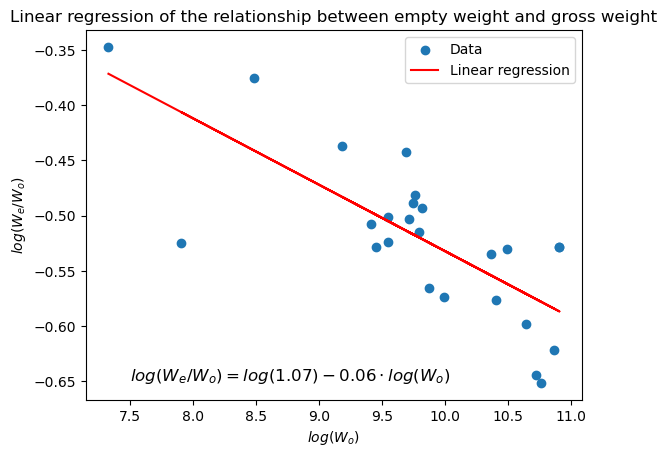

In [41]:
import matplotlib.pyplot as plt
plt.scatter(X, Y, label='Data')
plt.plot(X, LR.predict(X), color='red', label='Linear regression')
plt.xlabel('$log(W_o)$')
plt.ylabel('$log(W_e/W_o)$')
# add annotation for the expression of the linear regression
plt.text(7.5, -0.65, '$log(W_e/W_o) = log(%.2f) %.2f \cdot log(W_o)$' % (A, c), fontsize=12)

plt.legend()
plt.title('Linear regression of the relationship between empty weight and gross weight')
plt.savefig('Linear_regression.svg', dpi=300, bbox_inches='tight')